In [1]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import re

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import zipfile
import os
#from statsmodels.formula.api import ols
#import statsmodels.formula.api as smf


In [2]:
#set your working directory
wd="/Users/gargidangwal/Documents/GitHub/Final_Project"
#import zipfile -- for later maybe
#with zipfile.ZipFile("src/original_data/original_data.zip") as zip_ref:
#    zip_ref.extractall("./original_data") 

In [3]:
#Load in dataset
nlsy_data_raw = pd.read_csv(wd + "/src/original_data/NLSY_79.csv")
var_info_raw = pd.read_excel(wd + "/src/original_data/var_info.xls")

In [4]:
nlsy_data_raw

,R0000100,R0155400,R0169100,R0173600,R0214700,R0214800,R0214900,R0214901,R0215700,R0215710,...,T5024800,T5619500,T5619700,T5619900,T5620100,T5620200,T5620300,T5771500,T5772700,T5772800
0,1,4620,-4,5,3,2,1,1,52,1516,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
1,2,4000,-4,5,3,2,1,1,34,1190,...,52,23000,-4,-4,-4,-4,-4,57,1820,52
2,3,-4,4000,5,3,2,1,1,38,-3,...,52,29000,-4,-4,-4,-4,-4,55,1730,52
3,4,-4,-3,5,3,2,3,2,0,0,...,-5,73000,-4,-4,-4,-4,-4,55,1152,24
4,5,2200,-4,1,3,1,1,1,46,1072,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12681,12682,500,-4,15,3,1,8,4,0,0,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
12682,12683,0,-4,15,3,1,8,4,0,0,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
12683,12684,0,-4,15,3,1,8,4,0,0,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5
12684,12685,0,-4,16,2,1,1,1,0,0,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5


In [5]:
var_info_raw

,nlsy_name,questionaire,readable_name,survey_year
0,T5023600,AGEATINT,age,2014
1,T5771500,AGEATINT,age,2016
2,R0216500,AGEATINT,age,1979
3,R0406510,AGEATINT,age,1980
4,R0619010,AGEATINT,age,1981
...,...,...,...,...
124,R6364601,Q13-5_TRUNC_REVISED,earnings,1997
125,R6909701,Q13-5_TRUNC_REVISED,earnings,1999
126,T2076700,Q13-5_TRUNC,earnings,2007
127,T3045300,Q13-5_TRUNC,earnings,2009


In [6]:
#check for duplicates in nlsy_name
if len(var_info_raw) == len(var_info_raw["nlsy_name"].value_counts()):
    print("nlsy_name is unique")
else:
    print("nlsy_name is not unique")

nlsy_name is unique


In [7]:
# Combine readable_name with survey_year


var_info = var_info_raw
var_info = var_info.astype({'survey_year':'str'})
var_info["readable_name_year"] = var_info["readable_name"] + "_" + var_info["survey_year"]

# Change the time-invariant readable variable names

var_info["readable_name_year"] = var_info["readable_name_year"].str.replace("_invariant","")


In [8]:
var_info

,nlsy_name,questionaire,readable_name,survey_year,readable_name_year
0,T5023600,AGEATINT,age,2014,age_2014
1,T5771500,AGEATINT,age,2016,age_2016
2,R0216500,AGEATINT,age,1979,age_1979
3,R0406510,AGEATINT,age,1980,age_1980
4,R0619010,AGEATINT,age,1981,age_1981
...,...,...,...,...,...
124,R6364601,Q13-5_TRUNC_REVISED,earnings,1997,earnings_1997
125,R6909701,Q13-5_TRUNC_REVISED,earnings,1999,earnings_1999
126,T2076700,Q13-5_TRUNC,earnings,2007,earnings_2007
127,T3045300,Q13-5_TRUNC,earnings,2009,earnings_2009


In [9]:
def negative_as_missing(value):
    """Returns pandas missing for negative values
    
    Args:
    value (string/float/integer): any value
    
    Returns:
    (string/float): pandas missing if value is negative; else value itself
    
    """
    
    if type(value) != str:
        if value < 0:
            out = np.nan
        else:
            out = value
    else:
        out = value
    return out

In [10]:
nlsy_df = nlsy_data_raw.applymap(negative_as_missing)
nlsy_df.head()

,R0000100,R0155400,R0169100,R0173600,R0214700,R0214800,R0214900,R0214901,R0215700,R0215710,...,T5024800,T5619500,T5619700,T5619900,T5620100,T5620200,T5620300,T5771500,T5772700,T5772800
0,1,4620.0,NaN,5,3,2,1.0,1.0,52.0,1516.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4000.0,NaN,5,3,2,1.0,1.0,34.0,1190.0,...,52.0,23000.0,NaN,NaN,NaN,NaN,NaN,57.0,1820.0,52.0
2,3,NaN,4000.0,5,3,2,1.0,1.0,38.0,NaN,...,52.0,29000.0,NaN,NaN,NaN,NaN,NaN,55.0,1730.0,52.0
3,4,NaN,NaN,5,3,2,3.0,2.0,0.0,0.0,...,NaN,73000.0,NaN,NaN,NaN,NaN,NaN,55.0,1152.0,24.0
4,5,2200.0,NaN,1,3,1,1.0,1.0,46.0,1072.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
### Renaming all variables with readable names
name_dict = dict(zip(var_info["nlsy_name"], var_info["readable_name_year"]))
# name_dict = dict(zip(var_info["nlsy_name"], var_info["readable_name"]))

nlsy_df.rename(columns=(name_dict), inplace=True)

nlsy_df.head()

,individual_id,R0155400,earnings_1978,R0173600,R0214700,sex,participation_1979,R0214901,weeks_worked_1978,hours_worked_1978,...,weeks_worked_2013,earnings_2015,T5619700,T5619900,T5620100,T5620200,T5620300,age_2016,hours_worked_2015,weeks_worked_2015
0,1,4620.0,NaN,5,3,2,1.0,1.0,52.0,1516.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4000.0,NaN,5,3,2,1.0,1.0,34.0,1190.0,...,52.0,23000.0,NaN,NaN,NaN,NaN,NaN,57.0,1820.0,52.0
2,3,NaN,4000.0,5,3,2,1.0,1.0,38.0,NaN,...,52.0,29000.0,NaN,NaN,NaN,NaN,NaN,55.0,1730.0,52.0
3,4,NaN,NaN,5,3,2,3.0,2.0,0.0,0.0,...,NaN,73000.0,NaN,NaN,NaN,NaN,NaN,55.0,1152.0,24.0
4,5,2200.0,NaN,1,3,1,1.0,1.0,46.0,1072.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
### Keep only those variables that are present in NLSY Variable Information file
droplist = [i for i in nlsy_df.columns if i not in set(var_info["readable_name_year"])]
nlsy_df.drop(droplist,axis=1,inplace=True)

nlsy_df.head()

,individual_id,earnings_1978,sex,participation_1979,weeks_worked_1978,hours_worked_1978,age_1979,earnings_1979,participation_1980,age_1980,...,hours_worked_2011,weeks_worked_2011,earnings_2013,age_2014,hours_worked_2013,weeks_worked_2013,earnings_2015,age_2016,hours_worked_2015,weeks_worked_2015
0,1,NaN,2,1.0,52.0,1516.0,20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,2,1.0,34.0,1190.0,20,NaN,1.0,21.0,...,1820.0,52.0,21000.0,55.0,1820.0,52.0,23000.0,57.0,1820.0,52.0
2,3,4000.0,2,1.0,38.0,NaN,17,NaN,1.0,18.0,...,1716.0,52.0,40000.0,53.0,2010.0,52.0,29000.0,55.0,1730.0,52.0
3,4,NaN,2,3.0,0.0,0.0,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73000.0,55.0,1152.0,24.0
4,5,NaN,1,1.0,46.0,1072.0,19,NaN,1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
nlsy_df.columns

Index(['individual_id', 'earnings_1978', 'sex', 'participation_1979',
       'weeks_worked_1978', 'hours_worked_1978', 'age_1979', 'earnings_1979',
       'participation_1980', 'age_1980',
       ...
       'hours_worked_2011', 'weeks_worked_2011', 'earnings_2013', 'age_2014',
       'hours_worked_2013', 'weeks_worked_2013', 'earnings_2015', 'age_2016',
       'hours_worked_2015', 'weeks_worked_2015'],
      dtype='object', length=129)

In [14]:
# Change individual_id into integer (is index variable)

print(nlsy_df["individual_id"].dtype)
nlsy_df["individual_id"] = nlsy_df["individual_id"].astype(int)

nlsy_df.head()


int64


,individual_id,earnings_1978,sex,participation_1979,weeks_worked_1978,hours_worked_1978,age_1979,earnings_1979,participation_1980,age_1980,...,hours_worked_2011,weeks_worked_2011,earnings_2013,age_2014,hours_worked_2013,weeks_worked_2013,earnings_2015,age_2016,hours_worked_2015,weeks_worked_2015
0,1,NaN,2,1.0,52.0,1516.0,20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,2,1.0,34.0,1190.0,20,NaN,1.0,21.0,...,1820.0,52.0,21000.0,55.0,1820.0,52.0,23000.0,57.0,1820.0,52.0
2,3,4000.0,2,1.0,38.0,NaN,17,NaN,1.0,18.0,...,1716.0,52.0,40000.0,53.0,2010.0,52.0,29000.0,55.0,1730.0,52.0
3,4,NaN,2,3.0,0.0,0.0,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73000.0,55.0,1152.0,24.0
4,5,NaN,1,1.0,46.0,1072.0,19,NaN,1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
### Change from wide to long format

varnames_long = set(list(map(lambda x: re.sub("\_[0-9]{4}$","",x), list(nlsy_df.columns)))[3::])
varnames_long

nlsy_df_long = pd.wide_to_long(df=nlsy_df,stubnames = varnames_long,i=["individual_id"],j="year",sep = "_")

nlsy_df_long.tail()

sex  participation  weeks_worked  age  earnings  \
individual_id year                                                    
12686         2012    1            NaN           NaN  NaN       NaN   
              2013    1            NaN           NaN  NaN       NaN   
              2014    1            NaN           NaN  NaN       NaN   
              2015    1            NaN           NaN  NaN       NaN   
              2016    1            NaN           NaN  NaN       NaN   

                    hours_worked  
individual_id year                
12686         2012           NaN  
              2013           NaN  
              2014           NaN  
              2015           NaN  
              2016           NaN

In [16]:
#labor market participatiion variable -> 1 if participated 0 if not
nlsy_df_long["participation"] = nlsy_df_long["participation"].replace(list([5,6,7]),0)
nlsy_df_long["participation"] = nlsy_df_long["participation"].replace(list([2,3,4,8]),1)

In [17]:
#load child data
child_data_raw = pd.read_csv(wd + "/src/original_data/child_data.csv")
child_var_info = pd.read_excel(wd + "/src/original_data/child_var_info.xlsx")

In [18]:
#changing the names of variables
name_dict = dict(zip(child_var_info["nlsy_name"], child_var_info["readable_name"]))
#adapting the names in the data file accordingly
child_data_raw.rename(columns=(name_dict), inplace=True)

In [19]:
# Changing data types
child_data_raw = child_data_raw.astype({'individual_id':'int', 'first_child':'int'})
# Setting individual_id as the index
child_data_raw.set_index(['individual_id'], inplace=True)

In [20]:
child_data = child_data_raw.applymap(negative_as_missing)
child_data = child_data.dropna()

In [21]:
# Merging two dataframe, using individual_id and year as indexes
df = pd.merge(nlsy_df_long, child_data, how="right", on=["individual_id"], right_index = True)

In [22]:
df = df.reset_index()
df

,individual_id,year,sex,participation,weeks_worked,age,earnings,hours_worked,first_child
0,2,1978,2,NaN,34.0,NaN,NaN,1190.0,1993.0
1,2,1979,2,1.0,52.0,20.0,NaN,1820.0,1993.0
2,2,1980,2,1.0,52.0,21.0,NaN,1820.0,1993.0
3,2,1981,2,1.0,52.0,22.0,10000.0,1820.0,1993.0
4,2,1982,2,1.0,52.0,23.0,11000.0,1820.0,1993.0
...,...,...,...,...,...,...,...,...,...
364450,12686,2012,1,NaN,NaN,NaN,NaN,NaN,1983.0
364451,12686,2013,1,NaN,NaN,NaN,NaN,NaN,1983.0
364452,12686,2014,1,NaN,NaN,NaN,NaN,NaN,1983.0
364453,12686,2015,1,NaN,NaN,NaN,NaN,NaN,1983.0


In [23]:
# Creating variables related to the birth of the first child
df["first_child_birth"] = np.where(df["first_child"] == df["year"], 1, 0)
df["event_time"] = df["year"] - df["first_child"]
df["any_children"] = np.where(df["event_time"] < 0, 0, 1)

In [24]:
#Filling the missing age variables
df['age'] = df.groupby('individual_id')['age'].fillna(df["age"].bfill() - 1 )
df['age'] = df.groupby('individual_id')['age'].fillna(df["age"].ffill() + 1)

In [25]:
df = df.drop(["first_child"], axis=1)
df.set_index(['individual_id','year'], inplace=True)
df.head()

sex  participation  weeks_worked   age  earnings  \
individual_id year                                                     
2             1978    2            NaN          34.0  19.0       NaN   
              1979    2            1.0          52.0  20.0       NaN   
              1980    2            1.0          52.0  21.0       NaN   
              1981    2            1.0          52.0  22.0   10000.0   
              1982    2            1.0          52.0  23.0   11000.0   

                    hours_worked  first_child_birth  event_time  any_children  
individual_id year                                                             
2             1978        1190.0                  0       -15.0             0  
              1979        1820.0                  0       -14.0             0  
              1980        1820.0                  0       -13.0             0  
              1981        1820.0                  0       -12.0             0  
              1982        1820.0                  0       -11.0             0

In [26]:
#changing datatypes
df = df.astype({'earnings':'Int64', 'age':'Int64','sex':'Int64',
                'any_children':'Int64','participation':'Int64',
                'weeks_worked':'Int64','hours_worked':'Int64','event_time':'Int64'})
df.dtypes

sex                  Int64
participation        Int64
weeks_worked         Int64
age                  Int64
earnings             Int64
hours_worked         Int64
first_child_birth    int64
event_time           Int64
any_children         Int64
dtype: object

In [27]:
#Summary statistics
df[["earnings", "weeks_worked", "age", "hours_worked","sex"]].describe()

,earnings,weeks_worked,age,hours_worked,sex
count,176614.000000,197601.000000,364455.000000,195136.000000,364455.000000
mean,19865.984814,35.105172,31.201858,1446.200312,1.528732
std,32164.487103,21.201681,12.427305,1048.693265,0.499174
min,0.000000,0.000000,13.000000,0.000000,1.000000
25%,544.250000,14.000000,20.000000,360.000000,1.000000
50%,11000.000000,50.000000,29.000000,1755.000000,2.000000
75%,26000.000000,52.000000,42.000000,2080.000000,2.000000
max,370314.000000,57.000000,60.000000,8736.000000,2.000000


<ipython-input-28-48fc0645c06c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['female'] = np.where(df2["sex"] == 2, 1, 0)


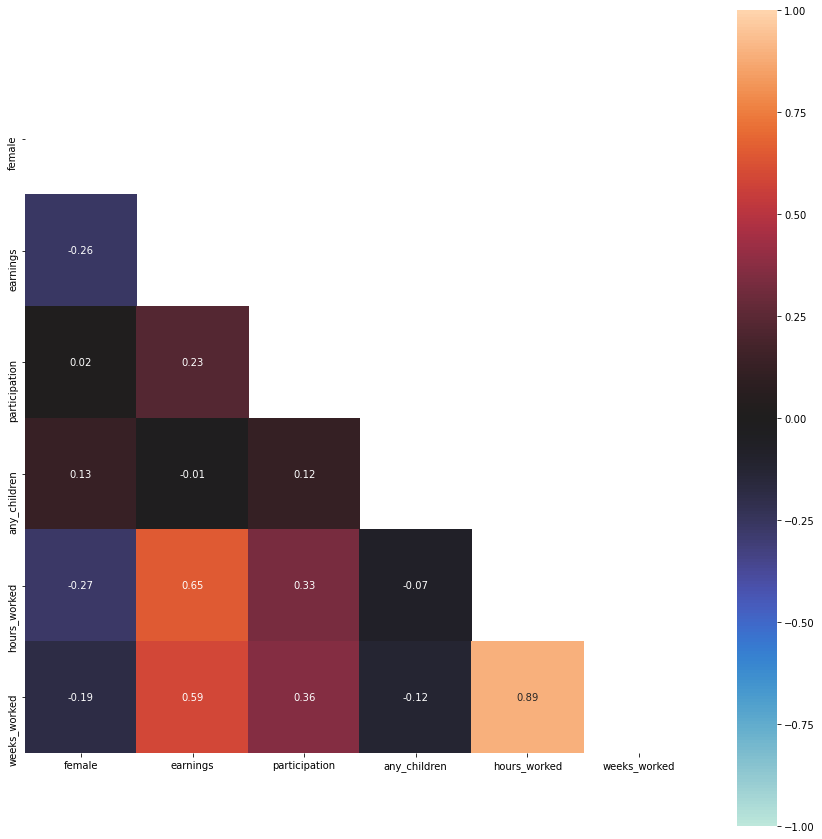

In [28]:
df2 = df.dropna()
df2['female'] = np.where(df2["sex"] == 2, 1, 0)
subscales_selection = ["female","earnings",'participation','any_children','hours_worked','weeks_worked']
subscale_items_columns = []

for subscale in subscales_selection:
    subscale_items = list(filter(lambda x: x.startswith(subscale), df2.columns))
    subscale_items_columns = subscale_items_columns + subscale_items

subscale_items_columns

### Calculate correlation matrix 

corr_matrix = df2[subscale_items_columns].corr()

### Create figure

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig_heatmap, axs = plt.subplots(figsize=(15, 15))
axs = sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", vmin=-1, vmax=1, mask=mask, square=True, center=0
)
plt.show()

In [29]:
df

sex  participation  weeks_worked  age  earnings  \
individual_id year                                                    
2             1978    2           <NA>            34   19      <NA>   
              1979    2              1            52   20      <NA>   
              1980    2              1            52   21      <NA>   
              1981    2              1            52   22     10000   
              1982    2              1            52   23     11000   
...                 ...            ...           ...  ...       ...   
12686         2012    1           <NA>          <NA>   34      <NA>   
              2013    1           <NA>          <NA>   34      <NA>   
              2014    1           <NA>          <NA>   34      <NA>   
              2015    1           <NA>          <NA>   34      <NA>   
              2016    1           <NA>          <NA>   34      <NA>   

                    hours_worked  first_child_birth  event_time  any_children  
individual_id year                                                             
2             1978          1190                  0         -15             0  
              1979          1820                  0         -14             0  
              1980          1820                  0         -13             0  
              1981          1820                  0         -12             0  
              1982          1820                  0         -11             0  
...                          ...                ...         ...           ...  
12686         2012          <NA>                  0          29             1  
              2013          <NA>                  0          30             1  
              2014          <NA>                  0          31             1  
              2015          <NA>                  0          32             1  
              2016          <NA>                  0          33             1  

[364455 rows x 9 columns]

In [30]:
indexNames = df[(df['event_time'] > 10) | (df['event_time'] < -5)].index
df.drop(indexNames , inplace=True)
df

sex  participation  weeks_worked  age  earnings  \
individual_id year                                                    
2             1988    2              1            52   29     19000   
              1989    2              1            52   30     20000   
              1990    2              1            52   31     20000   
              1991    2              1            52   32     22000   
              1992    2              1            52   33     25000   
...                 ...            ...           ...  ...       ...   
12686         1989    1              1            52   29     27000   
              1990    1              1            52   30     25500   
              1991    1              1            52   31     30000   
              1992    1              1            52   32     31000   
              1993    1              1          <NA>   33      <NA>   

                    hours_worked  first_child_birth  event_time  any_children  
individual_id year                                                             
2             1988          2240                  0          -5             0  
              1989          1820                  0          -4             0  
              1990          1820                  0          -3             0  
              1991          1820                  0          -2             0  
              1992          1820                  0          -1             0  
...                          ...                ...         ...           ...  
12686         1989          2175                  0           6             1  
              1990          2340                  0           7             1  
              1991          2561                  0           8             1  
              1992          2840                  0           9             1  
              1993          <NA>                  0          10             1  

[134648 rows x 9 columns]

In [31]:
#generating the event_time dummies (where t=-1 is omitted, implying that the event time coefficients measure
#the impact of children relative to the year just before the first child birth)
dummies = pd.get_dummies(df['event_time'])
dummies.columns = [ 'event_time_' + str(dummies) for dummies in range(1,17) ]
dummies = dummies.drop(["event_time_5"], axis=1)
df = pd.concat([df, dummies], axis=1)
df.head(35)

sex  participation  weeks_worked  age  earnings  \
individual_id year                                                    
2             1988    2              1            52   29     19000   
              1989    2              1            52   30     20000   
              1990    2              1            52   31     20000   
              1991    2              1            52   32     22000   
              1992    2              1            52   33     25000   
              1993    2              1             5   34         0   
              1994    2              0          <NA>   35      <NA>   
              1995    2           <NA>             0   36         0   
              1996    2              0          <NA>   37      <NA>   
              1997    2           <NA>             0   38         0   
              1998    2              0          <NA>   39      <NA>   
              1999    2           <NA>             0   40         0   
              2000    2           <NA>          <NA>   41      <NA>   
              2001    2           <NA>             0   42         0   
              2002    2           <NA>          <NA>   43      <NA>   
              2003    2           <NA>            18   44         0   
3             1978    2           <NA>            38   16      4000   
              1979    2              1            40   17      <NA>   
              1980    2              1          <NA>   18      <NA>   
              1981    2           <NA>            19   19      7000   
              1982    2              1             0   20         0   
              1983    2              1             0   21         0   
              1984    2              1            23   22      1300   
              1985    2              1             0   23         0   
              1986    2              1            24   24      1500   
              1987    2              1             7   25      1000   
              1988    2              1            15   26         0   
              1989    2              1            39   27      6000   
              1990    2              0             0   29      4000   
              1991    2              1            20   30      4000   
4             1978    2           <NA>             0   15      <NA>   
              1979    2              1          <NA>   16      <NA>   
              1980    2           <NA>             0   17      <NA>   
              1981    2              1            16   18      1086   
              1982    2              1             2   19        70   

                    hours_worked  first_child_birth  event_time  any_children  \
individual_id year                                                              
2             1988          2240                  0          -5             0   
              1989          1820                  0          -4             0   
              1990          1820                  0          -3             0   
              1991          1820                  0          -2             0   
              1992          1820                  0          -1             0   
              1993           175                  1           0             1   
              1994          <NA>                  0           1             1   
              1995             0                  0           2             1   
              1996          <NA>                  0           3             1   
              1997             0                  0           4             1   
              1998          <NA>                  0           5             1   
              1999             0                  0           6             1   
              2000          <NA>                  0           7             1   
              2001             0                  0           8             1   
              2002          <NA>                  0           9             1   
              2

In [32]:
def gen_balance_df(data, value, sex):
    df_1 = data.groupby(level = 0)[[value]].apply(lambda x: x.isna().sum())
    df_balance = df.loc[df_1.loc[df_1[value]== 0].index]
    df_balance= df_balance.astype(float)
    if sex == 1:
        df_balance_male = df_balance.drop(df_balance.index[df_balance["sex"]==2])
        return df_balance_male
    else:
        df_balance_female = df_balance.drop(df_balance.index[df_balance["sex"]==1])
        return df_balance_female

In [ ]:
df_hours_male = gen_balance_df (df , 'hours_worked', 1)
df_hours_female = gen_balance_df (df , 'hours_worked',2)
df_participation_male = gen_balance_df (df , 'participation',1)
df_participation_female = gen_balance_df (df , 'participation',2)
df_earnings_male = gen_balance_df (df , 'earnings',1)
df_earnings_female = gen_balance_df (df , 'earnings',2)

In [ ]:
df_hours_male

In [ ]:
df_earnings_female= df_earn.astype(float)
df_earnings_female.dtypes

In [ ]:
df_earnings_female

In [ ]:
#mod = smf.ols(formula="earnings ~ age ", data=df_earn)
X = df_earn["earnings"].astype(float)
Y = df_earn["age"].astype(float)

def get_reg_result (df,outcome):
    form = outcome + ' ~  C(age) +event_time_2'
    mod = smf.ols(formula=form', data=df) 

  ###  mod = smf.ols(formula='earnings ~  C(age) +event_time_2', data=df) 
    res = mod.fit()#add robust SE
    
    cof2 = res.params.event_time_2 # extract the beta hats 
    SE2 = res.bse.event_time_2     # extract the se
    result = [cof2,SE2 ]           # combine all betas and se
    return (result)
x = get_reg_result ( ... )
X

In [ ]:
# for loop logic 
outcome = somelist 
gender = somelist #

result = emptydataframe

for i in outcome:
    for j in gender:#
        df_bal = gen_balance_df (df , i, j )
        temp_result = get_reg_result(df_bal, i)
        temp_result["outcome"] = i 
        temp_result["gender"] = j 
        append result and temp_result 


    